In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

import yfinance as yf

In [3]:
start = '2012-01-01'
end = '2023-10-31'

df = yf.download('AAPL', start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.449693,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.516597,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.655555,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.787854,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.767573,394024400
2012-01-10,15.211071,15.214286,15.053571,15.115714,12.813286,258196400
2012-01-11,15.095714,15.101786,14.975357,15.091071,12.792396,215084800
2012-01-12,15.081429,15.103571,14.955357,15.049643,12.757277,212587200
2012-01-13,14.989286,15.016071,14.952143,14.993214,12.709440,226021600


In [5]:
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-17,176.649994,178.419998,174.800003,177.149994,176.916916,57549400
2023-10-18,175.580002,177.580002,175.110001,175.839996,175.608643,54764400
2023-10-19,176.039993,177.839996,175.190002,175.460007,175.229156,59302900
2023-10-20,175.309998,175.419998,172.639999,172.880005,172.652542,64189300
2023-10-23,170.910004,174.009995,169.929993,173.000000,172.772385,55980100
2023-10-24,173.050003,173.669998,171.449997,173.440002,173.211807,43816600
2023-10-25,171.880005,173.059998,170.649994,171.100006,170.874893,57157000
2023-10-26,170.369995,171.380005,165.669998,166.889999,166.670425,70625300
2023-10-27,166.910004,168.960007,166.830002,168.220001,167.998672,58499100


In [6]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,14.621429,14.732143,14.607143,14.686786,12.449693,302220800
1,2012-01-04,14.642857,14.810000,14.617143,14.765714,12.516597,260022000
2,2012-01-05,14.819643,14.948214,14.738214,14.929643,12.655555,271269600
3,2012-01-06,14.991786,15.098214,14.972143,15.085714,12.787854,318292800
4,2012-01-09,15.196429,15.276786,15.048214,15.061786,12.767573,394024400


In [7]:
df = df.drop(['Date', 'Adj Close'], axis=1)
df.head()

,Open,High,Low,Close,Volume
0,14.621429,14.732143,14.607143,14.686786,302220800
1,14.642857,14.810000,14.617143,14.765714,260022000
2,14.819643,14.948214,14.738214,14.929643,271269600
3,14.991786,15.098214,14.972143,15.085714,318292800
4,15.196429,15.276786,15.048214,15.061786,394024400


NB: Web App is predicting the close price

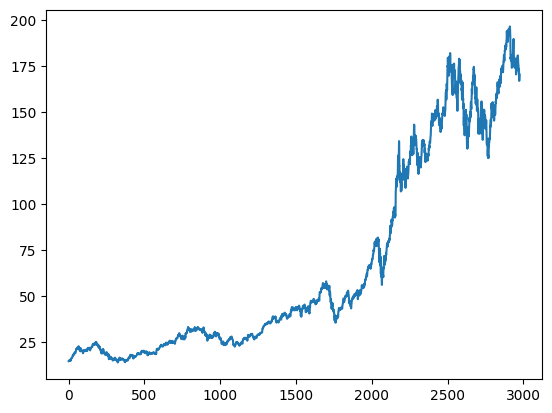

In [8]:
plt .plot(df['Close'])

In [9]:
df

,Open,High,Low,Close,Volume
0,14.621429,14.732143,14.607143,14.686786,302220800
1,14.642857,14.810000,14.617143,14.765714,260022000
2,14.819643,14.948214,14.738214,14.929643,271269600
3,14.991786,15.098214,14.972143,15.085714,318292800
4,15.196429,15.276786,15.048214,15.061786,394024400
...,...,...,...,...,...
2971,173.050003,173.669998,171.449997,173.440002,43816600
2972,171.880005,173.059998,170.649994,171.100006,57157000
2973,170.369995,171.380005,165.669998,166.889999,70625300
2974,166.910004,168.960007,166.830002,168.220001,58499100


Creating the moving averages

In [10]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2971    182.385101
2972    182.286601
2973    182.159701
2974    182.049801
2975    181.974501
Name: Close, Length: 2976, dtype: float64

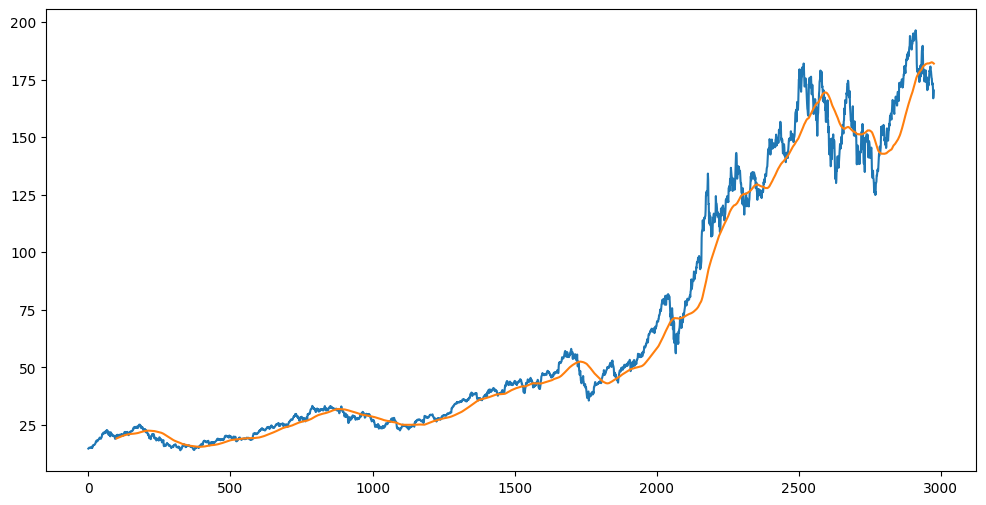

In [11]:
plt.figure(figsize= (12,6))
plt.plot(df.Close)
plt.plot(ma100)

In [12]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2971    169.97135
2972    170.17610
2973    170.35690
2974    170.53055
2975    170.71495
Name: Close, Length: 2976, dtype: float64

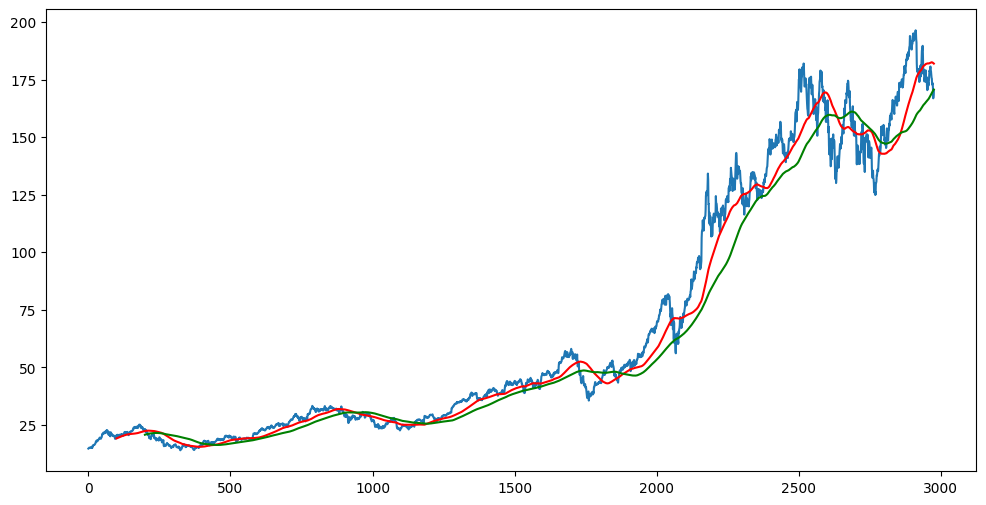

In [13]:
plt.figure(figsize= (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [14]:
df.shape

(2976, 5)

In [15]:
# Splitting the data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2083, 1)
(893, 1)


In [16]:
data_training.head()

,Close
0,14.686786
1,14.765714
2,14.929643
3,15.085714
4,15.061786


In [17]:
data_testing.head()

,Close
2083,71.107498
2084,71.672501
2085,70.699997
2086,69.232498
2087,67.092499


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [19]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01089548],
       [0.01205871],
       [0.01447467],
       ...,
       [0.7818429 ],
       [0.8012232 ],
       [0.85206874]])

In [20]:
data_training_array.shape

(2083, 1)

In [21]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
  x_train.append(data_training_array[i-100:i])
  y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [22]:
x_train.shape

(1983, 100, 1)

Building the ML Model

In [23]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [24]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True,
               input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(units=1))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [26]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs= 20)

Epoch 1/20
62/62 [==============================] - 27s 334ms/step - loss: 0.0304
Epoch 2/20
62/62 [==============================] - 18s 290ms/step - loss: 0.0068
Epoch 3/20
62/62 [==============================] - 20s 318ms/step - loss: 0.0060
Epoch 4/20
62/62 [==============================] - 18s 289ms/step - loss: 0.0045
Epoch 5/20
62/62 [==============================] - 18s 290ms/step - loss: 0.0045
Epoch 6/20
62/62 [==============================] - 20s 317ms/step - loss: 0.0042
Epoch 7/20
62/62 [==============================] - 18s 288ms/step - loss: 0.0040
Epoch 8/20
62/62 [==============================] - 18s 288ms/step - loss: 0.0034
Epoch 9/20
62/62 [==============================] - 19s 315ms/step - loss: 0.0034
Epoch 10/20
62/62 [==============================] - 18s 289ms/step - loss: 0.0036
Epoch 11/20
62/62 [==============================] - 18s 289ms/step - loss: 0.0033
Epoch 12/20
62/62 [==============================] - 19s 315ms/step - loss: 0.0031
Epoch 13/20
6

In [27]:
model.save('keras_model_LSTM.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [28]:
data_testing.head()

,Close
2083,71.107498
2084,71.672501
2085,70.699997
2086,69.232498
2087,67.092499


In [29]:
past_100_days = data_training.tail(100)

In [30]:
final_df = past_100_days.append(data_testing, ignore_index=True)

<ipython-input-30-27e824f269e9>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


In [31]:
final_df.head()

,Close
0,66.572502
1,65.797501
2,65.502502
3,65.445000
4,66.592499


In [32]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.0746665 ],
       [0.06914488],
       [0.06704311],
       [0.06663343],
       [0.07480897],
       [0.07110417],
       [0.07742729],
       [0.07637641],
       [0.07087261],
       [0.06248333],
       [0.06656216],
       [0.07340183],
       [0.08253922],
       [0.07578864],
       [0.07856726],
       [0.08264609],
       [0.0838751 ],
       [0.09044761],
       [0.09883688],
       [0.09981656],
       [0.09862315],
       [0.09912188],
       [0.09808882],
       [0.10621094],
       [0.10669183],
       [0.11673763],
       [0.11654168],
       [0.11960528],
       [0.12339918],
       [0.13533301],
       [0.13013198],
       [0.13435334],
       [0.13184194],
       [0.14039152],
       [0.15186223],
       [0.15310901],
       [0.16491815],
       [0.15729476],
       [0.15490801],
       [0.16185454],
       [0.16807085],
       [0.16422352],
       [0.16623625],
       [0.16896143],
       [0.16732274],
       [0.15065105],
       [0.16621842],
       [0.178

In [33]:
input_data.shape

(993, 1)

In [34]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)

In [35]:
print(x_test.shape)
print(y_test.shape)

(893, 100, 1)
(893,)


In [38]:
# Making Prediction

y_pred = model.predict(x_test)


28/28 [==============================] - 2s 83ms/step


In [39]:
y_pred.shape

(893, 1)

In [40]:
y_test

array([0.10697682, 0.11100228, 0.10407351, 0.09361808, 0.0783713 ,
       0.09213974, 0.09023387, 0.10437634, 0.10473259, 0.09655699,
       0.1128547 , 0.12366634, 0.11524146, 0.12252642, 0.13036354,
       0.13583173, 0.14137113, 0.15275281, 0.16144491, 0.1550327 ,
       0.1483355 , 0.15170193, 0.14844237, 0.16135582, 0.15811414,
       0.16896143, 0.16472225, 0.16835584, 0.16450852, 0.16696648,
       0.16721587, 0.16666371, 0.17362808, 0.176282  , 0.17945247,
       0.17446523, 0.19081632, 0.19430739, 0.21306307, 0.22882639,
       0.19865344, 0.20381881, 0.2112819 , 0.22747269, 0.22659994,
       0.22684933, 0.22326917, 0.23956682, 0.25321056, 0.24168642,
       0.25020039, 0.23023353, 0.24475002, 0.25012912, 0.24890012,
       0.24890012, 0.26624871, 0.26418255, 0.27964306, 0.2825642 ,
       0.28375755, 0.2806049 , 0.29186188, 0.29661757, 0.28805016,
       0.28666086, 0.30112392, 0.2914522 , 0.29339366, 0.26184923,
       0.26021053, 0.27584917, 0.26475254, 0.27748786, 0.28568

In [41]:
y_pred

array([[0.05872552],
       [0.05952811],
       [0.06106046],
       [0.06328642],
       [0.06609984],
       [0.0693165 ],
       [0.07275878],
       [0.07626453],
       [0.07972107],
       [0.08304811],
       [0.0861809 ],
       [0.08909886],
       [0.09182581],
       [0.09437789],
       [0.09678788],
       [0.0991021 ],
       [0.1013637 ],
       [0.10362701],
       [0.10595125],
       [0.10839579],
       [0.11098658],
       [0.11370976],
       [0.11653984],
       [0.11941935],
       [0.12229898],
       [0.12509954],
       [0.1278218 ],
       [0.13046321],
       [0.13300028],
       [0.13535824],
       [0.13758485],
       [0.13970006],
       [0.1417269 ],
       [0.14360413],
       [0.14532195],
       [0.14692026],
       [0.14838587],
       [0.14974369],
       [0.15106313],
       [0.15241882],
       [0.1539399 ],
       [0.15566841],
       [0.15766802],
       [0.16007997],
       [0.16290535],
       [0.166079  ],
       [0.16955964],
       [0.173

In [42]:
scaler.scale_

array([0.00712466])

In [43]:
scale_factor = 1/0.00712466
y_test = y_test * scale_factor
y_pred = y_pred * scale_factor

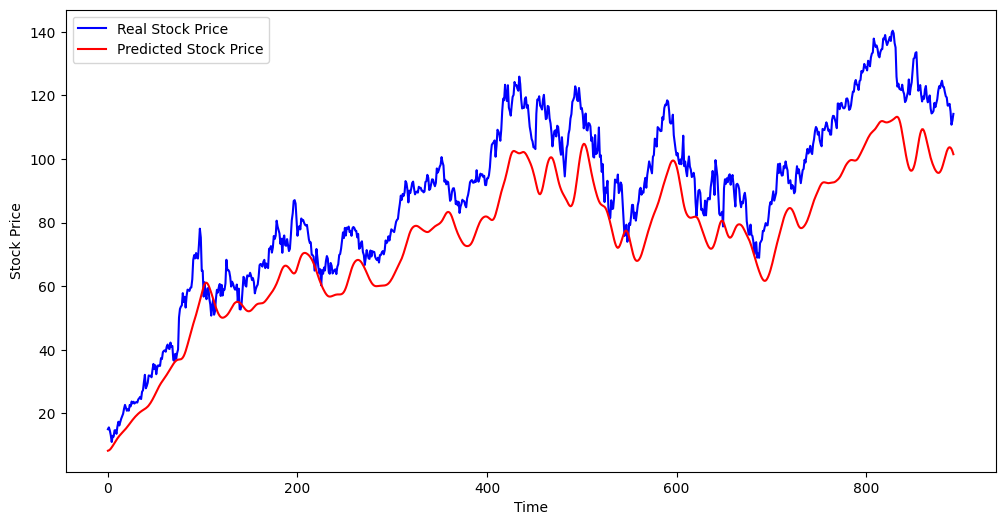

In [44]:
plt.figure(figsize=(12,6))
plt.plot(y_test, color='blue', label='Real Stock Price')
plt.plot(y_pred, color='red', label='Predicted Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()